In [15]:
import cv2
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import math


In [16]:
img = cv2.imread("data_raw/image/20224869/20224869_Head facing forward_27.551719198255583_51.jpg")

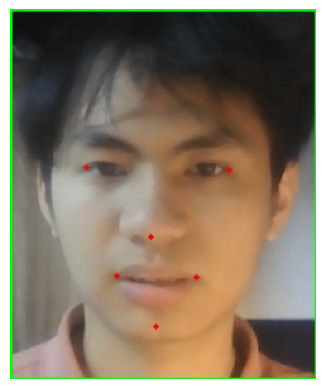

In [17]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img) # RGB

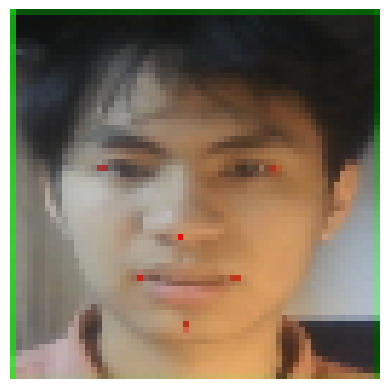

In [18]:
img = cv2.resize(img, (64, 64))
plt.axis('off')
plt.imshow(img)

In [19]:
class FaceLoading:
    def __init__(self,directory):
        self.directory = directory
        self.target_size = (64, 64)
        self.X = []
        self.y = []
    def extract_face(self,path):
        img = cv2.imread(path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        face = cv2.resize(img, self.target_size)
        return face
    def load_face_and_class(self):
        for sub_dir in os.listdir(self.directory):
            sub_dir_path = os.path.join(self.directory, sub_dir)
            for img_name in os.listdir(sub_dir_path):
                face = self.extract_face(os.path.join(sub_dir_path, img_name))
                self.X.append(face)
                self.y.append(sub_dir)
        return np.array(self.X), np.array(self.y)
    def plot_images(self):
        num_columns = 3
        num_rows = math.ceil(len(self.X) / num_columns)  # Ensure row count covers all images

        plt.figure(figsize=(num_columns * 3, num_rows * 3))  # Adjust figure size dynamically
        for num, img in enumerate(self.X):
            plt.subplot(num_rows, num_columns, num + 1)
            plt.imshow(img)
            plt.axis('off')
        plt.tight_layout()  # Improve layout spacing
        plt.show()


In [20]:
face_loading = FaceLoading(r"C:\Users\admin\OneDrive - Hanoi University of Science and Technology\Documents\GitHub\PTTK\face_recognization\source\data_raw\image")
X,y = face_loading.load_face_and_class()

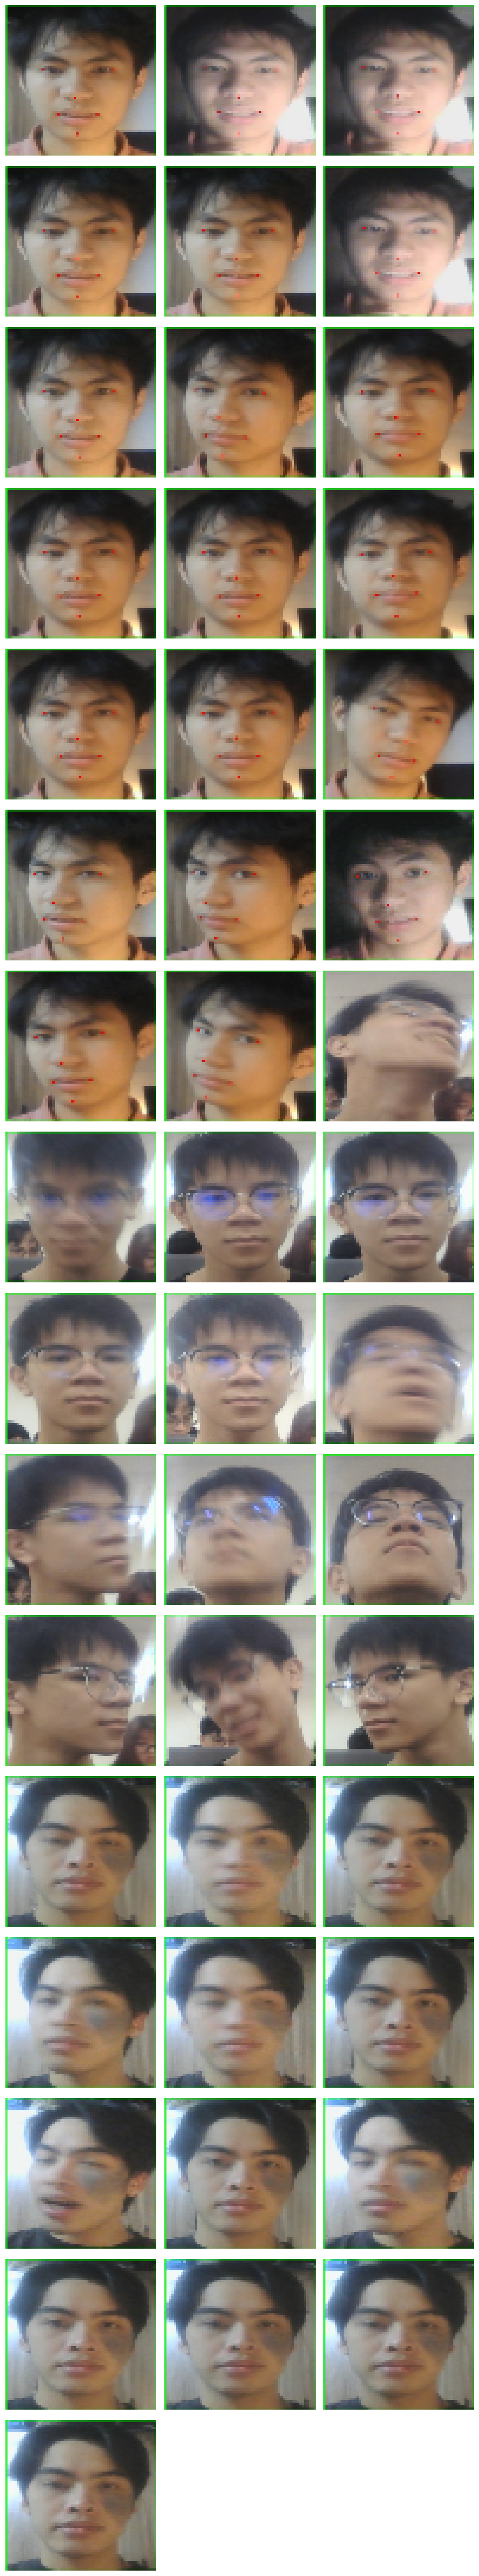

In [21]:
face_loading.plot_images()

In [22]:
len(y),print(y)

['20224869' '20224869' '20224869' '20224869' '20224869' '20224869'
 '20224869' '20224869' '20224869' '20224869' '20224869' '20224869'
 '20224869' '20224869' '20224869' '20224869' '20224869' '20224869'
 '20224869' '20224869' '20224981' '20224981' '20224981' '20224981'
 '20224981' '20224981' '20224981' '20224981' '20224981' '20224981'
 '20224981' '20224981' '20224981' '20228683' '20228683' '20228683'
 '20228683' '20228683' '20228683' '20228683' '20228683' '20228683'
 '20228683' '20228683' '20228683' '20228683']


(46, None)

In [23]:
from sklearn.preprocessing import LabelEncoder
encode =  LabelEncoder()
encoded_y = encode.fit_transform(y)

# **LOAD MODEL**

In [24]:
from tensorflow.keras.models import load_model, Model
model = load_model(r'C:\Users\admin\OneDrive - Hanoi University of Science and Technology\Documents\GitHub\PTTK\face_recognization\model\my_model.h5')

In [25]:
model.summary()

Model: "ResNet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 64, 64, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, 70, 70, 3) │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1 (Conv2D)      │ (None, 32, 32,    │      9,472 │ zero_padding2d[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_conv1            │ (None, 32, 32,    │        256 │ conv1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 32, 32,    │          0 │ bn_conv1[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ res2a_first_compon… │ (None, 16, 16,    │      4,160 │ activation[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn2a_first_compone… │ (None, 16, 16,    │        256 │ res2a_first_comp… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 16, 16,    │          0 │ bn2a_first_compo… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ res2a_second_compo… │ (None, 16, 16,    │     36,928 │ activation_1[0][… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn2a_second_compon… │ (None, 16, 16,    │        256 │ res2a_second_com… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 16, 16,    │          0 │ bn2a_second_comp… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ res2a_third_compon… │ (None, 16, 16,    │     16,640 │ activation_2[0][… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ res2a_merge         │ (None, 16, 16,    │     16,640 │ activation[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn2a_third_compone… │ (None, 16, 16,    │      1,024 │ res2a_third_comp… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn2a_merge          │ (None, 16, 16,    │      1,024 │ res2a_merge[0][0] │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 16, 16,    │          0 │ bn2a_third_compo… │
│                     │ 256)              │            │ bn2a_merge[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 16, 16,    │          0 │ add[0][0]       

 Total params: 9,408,586 (35.89 MB)

 Trainable params: 9,377,992 (35.77 MB)

 Non-trainable params: 30,592 (119.50 KB)

 Optimizer params: 2 (12.00 B)

In [26]:
embedding_model = Model(inputs=model.input,
                        outputs=model.get_layer('flatten').output)

In [30]:
X_norm = X / 255.0

In [32]:
print(X_norm[0])

[[[0.07058824 0.72941176 0.0745098 ]
  [0.02745098 0.3254902  0.03137255]
  [0.03137255 0.3254902  0.03137255]
  ...
  [0.03137255 0.36862745 0.03137255]
  [0.03137255 0.36862745 0.03137255]
  [0.02352941 0.43921569 0.02352941]]

 [[0.09803922 0.60392157 0.09411765]
  [0.07843137 0.05490196 0.0627451 ]
  [0.05882353 0.0627451  0.06666667]
  ...
  [0.1254902  0.12156863 0.10588235]
  [0.12156863 0.11764706 0.10196078]
  [0.01568627 0.23529412 0.01176471]]

 [[0.09411765 0.60784314 0.10588235]
  [0.06666667 0.07058824 0.04705882]
  [0.05098039 0.06666667 0.0627451 ]
  ...
  [0.12941176 0.1254902  0.10980392]
  [0.1254902  0.12156863 0.10588235]
  [0.02352941 0.23137255 0.01568627]]

 ...

 [[0.31764706 0.83921569 0.28235294]
  [0.7372549  0.63137255 0.64313725]
  [0.7254902  0.63137255 0.63137255]
  ...
  [0.20392157 0.18039216 0.19607843]
  [0.2        0.18431373 0.19215686]
  [0.04313725 0.29803922 0.04313725]]

 [[0.30196078 0.81176471 0.25490196]
  [0.69803922 0.56862745 0.57254902]


In [33]:
embeddings = []
labels = []

for img, label in zip(X_norm, y):
    emb = embedding_model.predict(img[np.newaxis])[0]
    embeddings.append(emb)
    labels.append(label)

np.save('user_embeddings.npy', np.array(embeddings))
np.save('user_labels.npy', np.array(labels))

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━

In [34]:
emb.shape

(4096,)

In [35]:
labels[:5]

['20224869', '20224869', '20224869', '20224869', '20224869']

In [36]:
embeddings = np.load('user_embeddings.npy')
labels = np.load('user_labels.npy')

# Dự đoán
img = load_and_preprocess('frame.jpg')
embedding = embedding_model.predict(img[np.newaxis])[0]

from sklearn.metrics.pairwise import cosine_similarity

def recognize_face(embedding, embeddings_db, labels, threshold=0.7):
    sims = cosine_similarity([embedding], embeddings_db)[0]
    idx = np.argmax(sims)
    if sims[idx] >= threshold:
        return labels[idx]
    else:
        return "Unknown"

result = recognize_face(embedding, embeddings, labels)
print("Nhận diện:", result)

NameError: name 'load_and_preprocess' is not defined